<a href="https://colab.research.google.com/github/ElizabethEwurabena/CV_ENG_8160/blob/main/dummies_TRAFFIC_SIGN_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#create a training and test data

# previously we treated as a regression problem but now we are using cross-entropy loss

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
%cd /content/drive/MyDrive/CV_ENG_8160/module 5

/content/drive/MyDrive/CV_ENG_8160/module 5


In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from skimage import io, transform
from tqdm import tqdm

In [4]:
import os
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In [5]:
import os
print (len(os.listdir('data/traffic_signs_class/00029')))

290


In [35]:
class traffic_sign(Dataset):
    def __init__(self, root_dir ):

        # initialize dataset variables here
        # self.root = root_dir
        self.root = Path(root_dir)

        self.df = pd.DataFrame(columns = ['image_names','class_label'])

        for fldr in self.root.iterdir():
          img_names = []
          if fldr.is_dir():
            img_names = img_names + list(fldr.glob('*.ppm'))

          img_names = [i for i in img_names]
          df_cur = pd.DataFrame(img_names,columns = ['image_names'])
          df_cur['class_label'] = fldr.name
          self.df = pd.concat([self.df, df_cur],axis=0)

        self.df = self.df.sample(frac=1)
        self.df=self.df.head(1700)

        dummies=pd.get_dummies(data=self.df, columns=['class_label'])
        self.df=self.df.merge(dummies, on='image_names')

        self.image_names = list(self.df['image_names'].values)
        # self.class_label = list(self.df['class_label'].values)
        # self.class_label = list(self.df['class_label'].iloc[:, 2:].values)
        self.class_label = self.df.iloc[:, 2:].values.tolist()

    def __len__(self):
        # returns the length of the dataset
        return len(self.image_names)

    def __getitem__(self, idx):

        # preprocess and transformations
        # indexes the dataset such that dataset[i] can retrieve the ith sample.
        image = self.image_names[idx]
        # scale = Rescale(256)
        image_data = io.imread(image)
        # image_np = Image.fromarray(image_data)

        # label = float(self.class_label[idx].strip('0'))
        # label = float(self.class_label[idx].strip('0')) #convert label to tensor
        label = torch.tensor(self.class_label[idx], dtype=torch.float32)

        sample = {'image': image_data, 'label': label}
        # sample = {'image': image_data, 'label': label}
        scale = Rescale((64,64)) #64x64x3 is the image size
        sample = scale(sample)

        return sample

In [7]:
## transform data
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, labels = sample['image'], sample['label']

        h, w = image.shape[:2]

        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        return {'image': img, 'label': labels}

In [39]:
class ToTensor(object):
    def __call__(self, sample):
        input, output = sample['image'], sample['label']

        return {'image': torch.tensor(np.array(input),dtype=torch.float32).reshape(16,-1),
                'label': torch.tensor(output,dtype=torch.float32).reshape(16,-1)}

In [9]:
traffic_sign_dataset = traffic_sign('data/traffic_signs_class')

In [10]:
len(traffic_sign_dataset.df)

1700

In [11]:
df_=traffic_sign_dataset.df.head(1700)

In [12]:
df_.head()

,image_names,class_label,class_label_00013,class_label_00014,class_label_00029,class_label_00031,class_label_00033,class_label_00034,class_label_00040
0,data/traffic_signs_class/00034/00008_00012.ppm,00034,0,0,0,0,0,1,0
1,data/traffic_signs_class/00040/00009_00018.ppm,00040,0,0,0,0,0,0,1
2,data/traffic_signs_class/00013/00026_00005.ppm,00013,1,0,0,0,0,0,0
3,data/traffic_signs_class/00013/00015_00002.ppm,00013,1,0,0,0,0,0,0
4,data/traffic_signs_class/00013/00042_00004.ppm,00013,1,0,0,0,0,0,0


In [13]:
for i, sample in enumerate(traffic_sign_dataset):
  print(i, sample['image'].shape, sample['label'])
  if i == 10:
    break

0 (64, 64, 3) tensor([0., 0., 0., 0., 0., 1., 0.])
1 (64, 64, 3) tensor([0., 0., 0., 0., 0., 0., 1.])
2 (64, 64, 3) tensor([1., 0., 0., 0., 0., 0., 0.])
3 (64, 64, 3) tensor([1., 0., 0., 0., 0., 0., 0.])
4 (64, 64, 3) tensor([1., 0., 0., 0., 0., 0., 0.])
5 (64, 64, 3) tensor([0., 0., 0., 1., 0., 0., 0.])
6 (64, 64, 3) tensor([1., 0., 0., 0., 0., 0., 0.])
7 (64, 64, 3) tensor([1., 0., 0., 0., 0., 0., 0.])
8 (64, 64, 3) tensor([0., 0., 1., 0., 0., 0., 0.])
9 (64, 64, 3) tensor([0., 1., 0., 0., 0., 0., 0.])
10 (64, 64, 3) tensor([1., 0., 0., 0., 0., 0., 0.])


In [14]:
df_.columns

Index(['image_names', 'class_label', 'class_label_00013', 'class_label_00014',
       'class_label_00029', 'class_label_00031', 'class_label_00033',
       'class_label_00034', 'class_label_00040'],
      dtype='object')

In [15]:
#the image classes

!ls 'data/traffic_signs_class'

00013  00014  00029  00031  00033  00034  00040


In [16]:
traffic_sign_dataset[10]['image'].reshape(-1,1).shape

(12288, 1)

In [17]:
traffic_sign_dataset[20]['label']

tensor([0., 1., 0., 0., 0., 0., 0.])

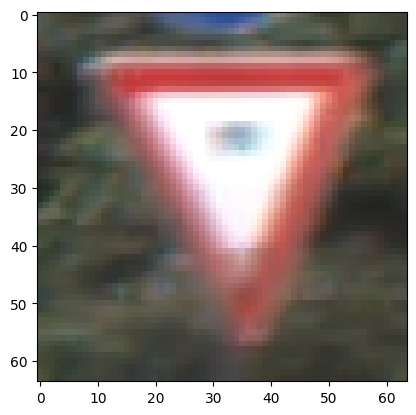

In [18]:
plt.imshow(traffic_sign_dataset[10]['image'])

In [20]:
ts = ToTensor()
sample = ts(traffic_sign_dataset)

In [21]:
print (sample['image'].shape)

(64, 64, 3)


In [22]:
## how will we add softmax to this
model = nn.Sequential(
        nn.Linear(12288, 256),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 7),
        nn.Softmax()
        )

In [23]:
bs = 16

dataloader = DataLoader(traffic_sign_dataset, batch_size=bs, shuffle=True, num_workers=4,drop_last=True)


In [24]:
for i, sample in enumerate(dataloader):
  # print (sample['image'].size())
  sample = ts(sample)
  print (sample['image'].size(), sample['label'].size())
  if i == 2:
    break

torch.Size([16, 12288]) torch.Size([16, 7])
torch.Size([16, 12288]) torch.Size([16, 7])
torch.Size([16, 12288]) torch.Size([16, 7])


In [25]:
criterion = nn.CrossEntropyLoss()
# criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [26]:
mean_loss = []
losses = []
test_losses = []
mean_test_loss = []
ts = ToTensor()
n_epochs = 10
for it in tqdm(range(n_epochs)):
  # zero the parameter gradients
  for i_batch, sample_batched in enumerate(dataloader):
    optimizer.zero_grad()
    sample_batched = ts(sample_batched)
    outputs = model(sample_batched['image'])
    loss = criterion(outputs, sample_batched['label'])
    losses.append(loss.item())
    # print (loss)

    loss.backward()
    optimizer.step()
  # mean_loss.append(np.mean(losses))
  mean_test_loss.append(np.mean(losses))
  print(f'Epoch {it+1}/{n_epochs}, Training Loss: {np.mean(losses):.4f}')


 10%|█         | 1/10 [01:44<15:36, 104.04s/it]

Epoch 1/10, Training Loss: 1.7904


 20%|██        | 2/10 [01:54<06:34, 49.27s/it] 

Epoch 2/10, Training Loss: 1.7758


 30%|███       | 3/10 [02:04<03:37, 31.01s/it]

Epoch 3/10, Training Loss: 1.7515


 40%|████      | 4/10 [02:14<02:16, 22.76s/it]

Epoch 4/10, Training Loss: 1.7299


 50%|█████     | 5/10 [02:24<01:31, 18.23s/it]

Epoch 5/10, Training Loss: 1.7202


 60%|██████    | 6/10 [02:34<01:01, 15.46s/it]

Epoch 6/10, Training Loss: 1.7116


 70%|███████   | 7/10 [02:44<00:41, 13.77s/it]

Epoch 7/10, Training Loss: 1.7054


 80%|████████  | 8/10 [02:54<00:24, 12.43s/it]

Epoch 8/10, Training Loss: 1.6915


 90%|█████████ | 9/10 [03:04<00:11, 11.68s/it]

Epoch 9/10, Training Loss: 1.6757


100%|██████████| 10/10 [03:14<00:00, 19.49s/it]

Epoch 10/10, Training Loss: 1.6624


In [27]:
torch.save(model.state_dict(), 'traffic_model.pt')

In [28]:
## load saved model
model_arch = nn.Sequential(
        nn.Linear(12288, 256),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 7)
        )
model_arch.load_state_dict(torch.load('traffic_model.pt'))
model_arch.eval()

Sequential(
  (0): Linear(in_features=12288, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=7, bias=True)
)

In [41]:
ts = ToTensor()
for i_batch, sample_batched in enumerate(dataloader):
      sample_batched = ts(sample_batched)
      outputs = model(sample_batched['image'])
      # outputs
      print (outputs.reshape(-1).tolist())
      print (sample_batched['label'].reshape(-1).tolist())
      print ('######')

[1.0, 9.290238340331077e-18, 1.2780297660162162e-22, 7.924643065241113e-14, 5.308158079753156e-11, 1.782796161334293e-21, 1.0275516769096173e-24, 0.9999943971633911, 1.0801270294846788e-10, 3.1671578337374995e-14, 1.1413976430674211e-08, 5.606173090200173e-06, 5.505317339157823e-13, 5.359901670447861e-15, 1.0, 2.4806616657885383e-19, 9.227121119095514e-26, 2.028913476909513e-15, 7.030892534842792e-11, 1.2911175206364664e-23, 2.265441349075573e-27, 0.9705600738525391, 2.9802278731949627e-05, 2.9176726457080804e-07, 0.00032803320209495723, 0.029079504311084747, 1.954603249032516e-06, 2.1820871154432098e-07, 1.0, 3.2386105124399845e-22, 1.3980197572521576e-29, 6.136421589841466e-18, 1.0572702652603128e-12, 2.976526462387423e-27, 1.456151150244954e-31, 0.9998775720596313, 2.3079327604591526e-07, 1.1514995179595644e-08, 5.147330739418976e-05, 7.071264553815126e-05, 1.5124427932278195e-08, 1.2719411079942233e-09, 2.447971247931946e-08, 1.2678334944393743e-13, 1.243060286577624e-20, 1.7121148

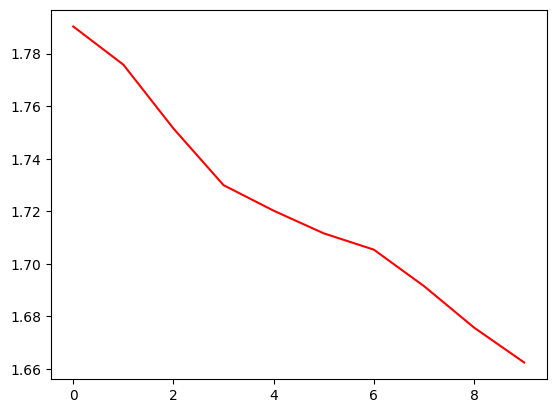

In [43]:
plt.plot(mean_test_loss,'r')

In [44]:
from utils.model import *
from dataset.data import *

In [45]:
model_arch.load_state_dict(torch.load('traffic_model.pt'))
model_arch.eval()

Sequential(
  (0): Linear(in_features=12288, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=7, bias=True)
)

In [53]:
class ToTensor(object):
    def __call__(self, sample):
        input, output = sample['image'], sample['label']

        return {'image': torch.tensor(np.array(input),dtype=torch.float32).reshape(16,-1),
                'label': torch.tensor(output,dtype=torch.float32).reshape(16,-1)}

In [56]:
ts = ToTensor()
acc_sum = 0
total_sum = 0

for i_batch, sample_batched in enumerate(dataloader):
    sample_batched = ts(sample_batched)
    outputs = model(sample_batched['image'])
    pred = np.argmax(outputs.detach().numpy(), axis=1)
    target = np.argmax(sample_batched['label'].numpy(), axis=1)

    batch_acc = np.mean(pred == target)
    acc_sum += batch_acc * len(pred)
    total_sum += len(pred)

accuracy = acc_sum / total_sum
print("Accuracy:", accuracy)


Accuracy: 0.6020047169811321


In [ ]:
# np.argmax(0,1,0,0) = np.argmax([0,0,1,0])

In [ ]:
# outputs = [0.0013, 0.9876, 0.0001, 0.0000004] -> [0,1]
# outputs = [0,1,0,0] -> index of maximum value
# targets =[0,0,1,0] -> index of maximum Value
# accuracy=np.mean(output=targets)

